In [30]:
import networkx as nx


In [31]:
number_of_nodes = 1000
#m : Number of edges to attach from a new node to existing nodes
number_of_edges = 2
G = nx.barabasi_albert_graph(n = number_of_nodes, m = number_of_edges)


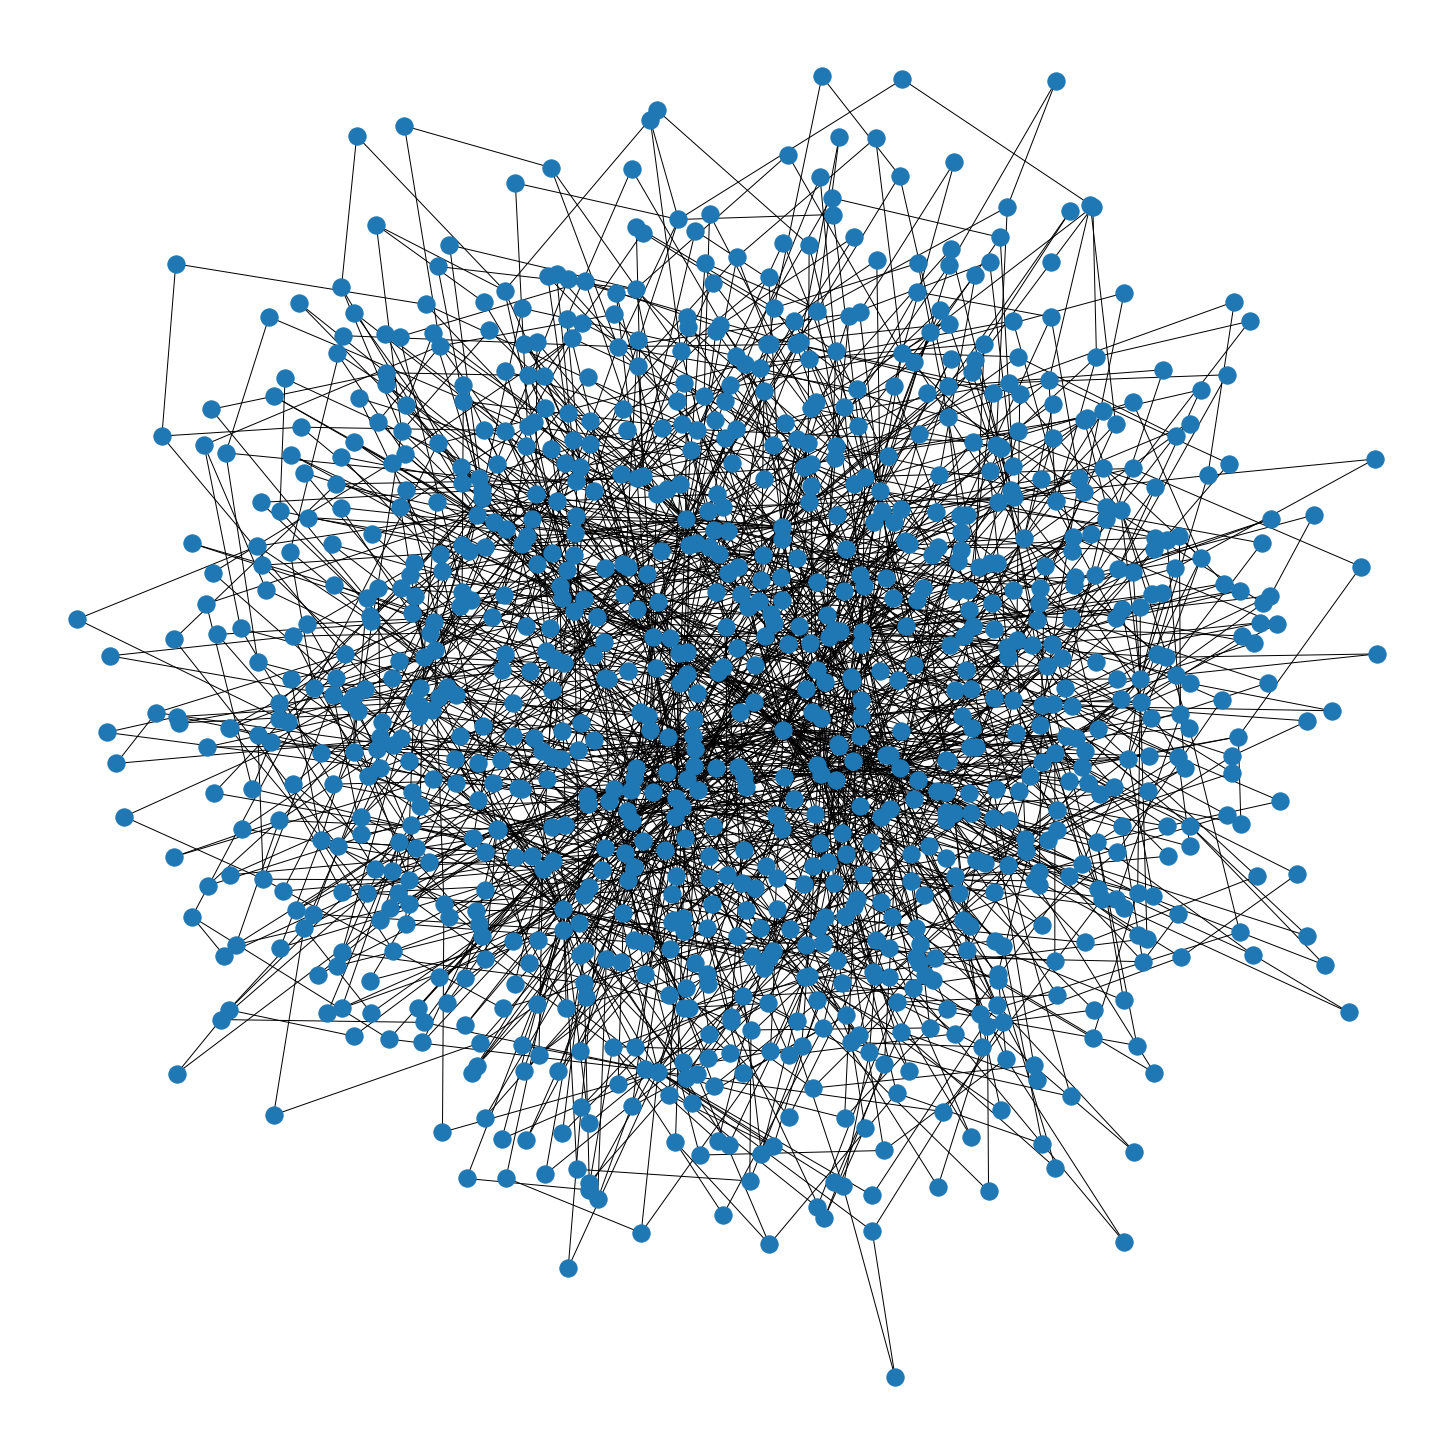

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (20,20))
nx.draw(G)


In [91]:
def play_pd(player, opponent):     
    if (player == 0) and (opponent == 0):
        return 1, 1
    
    elif (player == 0) and (opponent == 1):
        return 5, 0
    
    elif (player == 1) and (opponent == 1):
        return 3, 3
    
    elif (player == 1) and (opponent == 0):
        return 0,5
        

In [92]:
def decide(player, opponent):
    if player.state['id'] == 1:
        return 1
    elif player.state['id'] == 2:
        return 0
    elif player.state['id'] == 3:
        # First move
        if not player.history:
            return 1
        # React to the opponent's last move
        if opponent.history[-1] == 0:
            return 0
        return 1
    elif player.state['id'] == 4:
        return 1
    elif player.state['id'] == 5:
        return 1
    elif player.state['id'] == 6:
        return 1
    else:
        print('error: undefined strategy type')
        

In [ ]:
#find common neighbors
nx.common_neighbors(G, 0, 1)

In [148]:
import random
from nxsim import BaseNetworkAgent, BaseLoggingAgent

#the strategy is randomly selected
#agent: same as 'process' in SimPy but behaviours are limited
#by its network
class Player(BaseNetworkAgent):
    def __init__(self, environment=None, agent_id=1, state=()):
        super().__init__(environment=environment, agent_id=agent_id, state=state)
        #using agent_id to present strategy
        #1: UC
        #2: UD
        #3: TFT
        #4: CR
        #5: UR
        #6: SJ
        self.score = 0
        self.history = []
        #cooperate:1, defect:0
        self.behavior = decide(self, self)
        #self.stategy
    
    def update_score(self, payoff):
        self.score += payoff
    
    #decide to cooperate or defect by its strategy
    def update_behavior(self, neighbor):
        self.behavior = decide(self, neighbor)
        
    def update_history(self):
        self.history.append(self.behavior)
        
    #need to be developed
    def update_strategy():
        pass
    
    def game(self):
        my_neighbors = self.get_neighboring_agents()
        for neighbor in my_neighbors:
            #print(neighbor.state['id'])
            if neighbor is None:
                print('error: neighbor is None')
            else:
                my_payoff, neighbor_payoff = play_pd(self.behavior, neighbor.behavior)
                #print(my_payoff)
                #print(type(my_payoff))
                self.update_score(my_payoff)
                neighbor.update_score(neighbor_payoff)
                #print(neighbor.score)
                self.update_history()
                #print(self.history)
                neighbor.update_history()
                self.update_behavior(neighbor)
                #print(self.behavior)
                neighbor.update_behavior(self)
    
    def run(self):
        while True:
            self.game()
            yield self.env.event()

                

In [149]:
from nxsim import NetworkSimulation

init_states = [{'id': random.randint(1, 6),} for _ in range(number_of_nodes)]

#Start games
sim = NetworkSimulation(topology = G, states = init_states, agent_type = Player,
                        max_time = 30, dir_path = 'sim_01', num_trials = 1, logging_interval = 1.0)


In [150]:
sim.run_simulation()


Starting simulations...
---Trial 0---
Setting up agents...
Written 30 items to pickled binary file: sim_01/log.0.state.pickled
Simulation completed.


In [151]:
trial = BaseLoggingAgent.open_trial_state_history(dir_path='sim_01', trial_id=0)
